# 2. Iris의 세 가지 품종, 분류해볼 수 있겠어요?

### 학습목표
- scikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.
- scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.
- 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
- Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.
- 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.

## 2.2 Iris의 세 가지 품종, 분류해 볼까요? (1) 붓꽃 분류 문제

### 붓꽃 분류, 어떤 데이터로?
- 사이킷런(scikit-learn) : 머신러닝에서 가장 많이 쓰이는 라이브러리
    - 머신러닝의 다양한 알고리즘과 편리한 프레임워크를 제공

## 2.3 Iris의 세 가지 품종, 분류해 볼까요? (2) 데이터 준비, 그리고 자세히 살펴보기는 기본!

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris_data = iris.data
iris_data.shape

(150, 4)

In [4]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

- 머신러닝 모델이 출력해야 하는 정답을 라벨(label) 또는 타켓(target)이라고 한다

In [5]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.filename

'iris.csv'

## 2.4 첫 번째 머신러닝 실습, 간단하고도 빠르게! (1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비

- pandas : 파이썬에서 표 형태로 이루어진 2차원 배열 데이터를 다루는 데에 가장 많이 쓰이는 도구

In [10]:
import pandas as pd

print(pd.__version__)

1.3.3


In [11]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
# 정답 데이터도 추가
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- 문제지 : 머신러닝 모델에게 입력되는 데이터. feature라고 부르기도 한다. 변수 이름으로 x를 많이 사용
- 정답지 : 머신러닝 모델이 맞혀야 하는 데이터. label 또는 target 이라고 부르기도 한다. 변수 이름으로는 y를 많이 사용

- 학습에 사용하는 training dataset과 모델의 성능을 평가하는 데 사용하는 test dataset으로 데이터셋을 나누는 작업이 필요
- train_test_split : scikit-learn이 제공하는 데이터셋을 분리하는 함수

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


- random_state : train 데이터와 test 데이터를 분리하는데 적용되는 랜덤성을 결정

In [15]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [16]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [17]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

## 2.5 첫 번째 머신러닝 실습, 간단하고도 빠르게! (2) 첫 번째 머신러닝 모델 학습시키기
- 머신러닝은 지도학습 (Supervised Learning), 비지도 학습 (Unsupervised Learning) 으로 구분된다
    - 지도학습 : 정답이 있는 문제에 대해 학습
        - 분류 : 입력받은 데이터를 특정 카테고리 중 하나로 분류해내는 문제
        - 회귀 : 입력받은 데이터에 따라 특정 필드의 수치를 맞히는 문제
    - 비지도학습 : 정답이 없는 문제를 학습
-  Decision Tree 모델 (의사결정나무)
    - sklearn.tree 패키지 안에 DecisionTreeClassifier 라는 이름으로 내장

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [20]:
# 모델 학습
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

## 2.6 첫 번째 머신러닝 실습, 간단하고도 빠르게! (3) 첫 번째 머신러닝 모델 평가하기

In [21]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [22]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

- sklearn.metrics : 예측한 결과에 대한 수치를 조금 더 편리하게 확인가능

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

## 2.7 첫 번째 머신러닝 실습, 간단하고도 빠르게! (4) 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!

In [24]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



### Random Forest
- Decision Tree를 여러 개 모아놓은 Random Forest (앙상블 기법)
- sklearn.ensemble

In [25]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



### Support Vector Machine(SVM)
- Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘
    - Decision Boundary(결정 경계): 두 개의 클래스를 구분해 주는 선
    - Support Vector: Decision Boundary에 가까이 있는 데이터
    - Margin: Decision Boundary와 Support Vector 사이의 거리
        - Margin이 넓을수록 새로운 데이터를 잘 구분할 수 있다
    - Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업. 데이터의 분포가 Linearly separable 하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable하도록 만든다.
    - cost: Decision Boundary와 Margin의 간격 결정. cost가 높으면 Margin이 좁아지고 train error가 작아진다. 그러나 새로운 데이터에서는 분류를 잘 할 수 있다. cost가 낮으면 Margin이 넓어지고, train error는 커진다.
    - γ: 한 train data당 영향을 미치는 범위 결정. γ가 커지면 영향을 미치는 범위가 줄어들고, Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다. 따라서 Decision Boundary는 구불구불하게 그어진다. (오버피팅 초래 가능) 작아지면 데이터가 영향을 미치는 범위가 커지고, 대부분의 데이터가 Decision Boundary에 영향을 준다. 따라서 Decision Boundary를 직선에 가까워진다. 

In [26]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [28]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



### Stochastic Gradient Descent Classifier (SGDClassifier)
- 배치 크기가 1인 경사하강법 알고리즘
- 확률적 경사하강법은 데이터 세트에서 무작위로 균일하게 선택한 하나의 예를 의존하여 각 단계의 예측 경사를 계산
    - 배치 : 경사하강법에서 배치는 단일 반복에서 기울기를 계산하는 데 사용하는 예(data)의 총 개수

In [29]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [30]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.67      0.80        12
           2       0.78      1.00      0.88         7

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.89      0.87      0.86        30



### Logistic Regression
- 가장 널리 알려진 선형 분류 알고리즘
- 소프트맥스(softmas) 함수를 사용한 다중 클래스 분류 알고리즘이며, 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 한다.

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [32]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## 2.8 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (1) 정확도에는 함정이 있다

### 정확도에는 함정이 있다


In [33]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [34]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [35]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- 각 숫자는 픽셀값을 의미
- 이미지를 보기 위해서는 matplotlib이라는 라이브러리가 필요
- 일렬로 펴진 64개 데이터를 (8, 8)로 reshape해주는 것을 잊으면 안된다

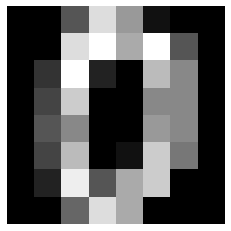

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

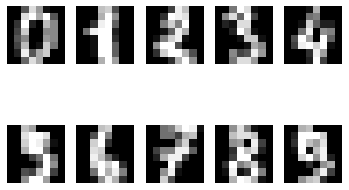

In [37]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [38]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- 정확도의 함정을 확인하는 실험
    - 해당 이미지 데이터가 3인지 아닌지를 맞히는 문제

In [39]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [46]:
# 의사결정나무 학습
# 1. 학습 데이터와 테스트 데이터로 나누기

x_train, x_test, y_train, y_test = train_test_split(digits_data, 
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=15)

# 2. 모델 학습 및 예측

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



- 90%의 label이 모두 0인데 이는 정답을 모두 0으로만 선택해도 정확도가 90프로 가량이 나오게 된다는 것

In [44]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

- -> 불균형한 데이터, unbalanced 데이터에서 자주 발생할 수 있는 문제
- 정확도는 정답의 분포에 따라 모델의 성능을 잘 평가하지 못하는 척도가 될 수 있다

## 2.9 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (2) 정답과 오답에도 종류가 있다!

- 오차 행렬(confusion matrix) : 정답가 오답을 구분하여 표현하는 방법
- https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html
- https://velog.io/@skyepodium/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%ED%8F%89%EA%B0%80-%EB%B0%A9%EB%B2%95

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

In [48]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])

- 모델이 예측했던 손글씨 결과의 Precision, Recall, F1 score는 각각 얼마가 되는지 확인
- sklearn.metrics의 classification_report를 활용

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [50]:
print(classification_report(y_test, fake_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



In [51]:
# 0은 잘 잡아내지만 3은 단 하나도 맞추지 못했다는

In [52]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

- label이 불균형하게 분포되어있는 데이터를 다룰 때 정확도만 평가하면 안된다